In [484]:
#read the data first (csv or json or database etc...)
#we have our zomato data set in the form of .csv file
#read the data -- data cleaning ---data analysis --  feature engineering
#100 features ,  restaurent is success / not

In [485]:
#import all the necessary packages

In [486]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [487]:
#read the data


In [488]:
df = pd.read_csv("C:/Users/sai kiran.dodda/Desktop/zomato.csv")

In [489]:
len(df)

51717

In [490]:
#sample of the data set

df.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [491]:
df.shape

(51717, 17)

In [492]:
df.columns

Index(['url', 'address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'phone', 'location', 'rest_type', 'dish_liked', 'cuisines',
       'approx_cost(for two people)', 'reviews_list', 'menu_item',
       'listed_in(type)', 'listed_in(city)'],
      dtype='object')

In [493]:
#problem Statements: 
   # 1) getting all the NAN features 
   # 2) getting data types of features and its overview
    

In [494]:
df.isnull().sum() 

# gives how many missing values in each feature

url                                0
address                            0
name                               0
online_order                       0
book_table                         0
rate                            7775
votes                              0
phone                           1208
location                          21
rest_type                        227
dish_liked                     28078
cuisines                          45
approx_cost(for two people)      346
reviews_list                       0
menu_item                          0
listed_in(type)                    0
listed_in(city)                    0
dtype: int64

In [495]:
feature_na = [feature for feature in df.columns if df[feature].isnull().sum()>1]
feature_na
    

['rate',
 'phone',
 'location',
 'rest_type',
 'dish_liked',
 'cuisines',
 'approx_cost(for two people)']

In [496]:
df['rate'].isnull().sum()/len(df)*100

#To get percentage for the feature that has missing values

15.033741322969234

In [497]:
for feature in feature_na:
    print('{} has {} % missing values'.format(feature,np.round(df[feature].isnull().sum()/len(df)*100,3)))

rate has 15.034 % missing values
phone has 2.336 % missing values
location has 0.041 % missing values
rest_type has 0.439 % missing values
dish_liked has 54.292 % missing values
cuisines has 0.087 % missing values
approx_cost(for two people) has 0.669 % missing values


In [498]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   url                          51717 non-null  object
 1   address                      51717 non-null  object
 2   name                         51717 non-null  object
 3   online_order                 51717 non-null  object
 4   book_table                   51717 non-null  object
 5   rate                         43942 non-null  object
 6   votes                        51717 non-null  int64 
 7   phone                        50509 non-null  object
 8   location                     51696 non-null  object
 9   rest_type                    51490 non-null  object
 10  dish_liked                   23639 non-null  object
 11  cuisines                     51672 non-null  object
 12  approx_cost(for two people)  51371 non-null  object
 13  reviews_list                 51

In [499]:
#problem_statements :
   # 1). Perform data cleaning is approx_cost feature
  #  2). clean your rate_num column
    

In [500]:
df['approx_cost(for two people)'].dtype

dtype('O')

In [501]:
#its showing as a object the cost must be in int or float data type

In [502]:
df['approx_cost(for two people)'].unique()

array(['800', '300', '600', '700', '550', '500', '450', '650', '400',
       '900', '200', '750', '150', '850', '100', '1,200', '350', '250',
       '950', '1,000', '1,500', '1,300', '199', '80', '1,100', '160',
       '1,600', '230', '130', '50', '190', '1,700', nan, '1,400', '180',
       '1,350', '2,200', '2,000', '1,800', '1,900', '330', '2,500',
       '2,100', '3,000', '2,800', '3,400', '40', '1,250', '3,500',
       '4,000', '2,400', '2,600', '120', '1,450', '469', '70', '3,200',
       '60', '560', '240', '360', '6,000', '1,050', '2,300', '4,100',
       '5,000', '3,700', '1,650', '2,700', '4,500', '140'], dtype=object)

In [503]:
#here you can see the comma(,) at soe values like 1,600 or 1,000 etc that is the reason its showing as an object

In [504]:
def remove_comma(x):
    return x.replace(',','')
df['approx_cost(for two people)'] = df['approx_cost(for two people)'].astype(str).apply(remove_comma) 

# here we defined a fuction remove_comma and returend in in  df['approx_cost(for two people)'] .



In [505]:
df['approx_cost(for two people)']

0         800
1         800
2         800
3         300
4         600
         ... 
51712    1500
51713     600
51714    2000
51715    2500
51716    1500
Name: approx_cost(for two people), Length: 51717, dtype: object

In [506]:
df['approx_cost(for two people)'].unique()

# we succesfully removed commas , then we can change the data type 

array(['800', '300', '600', '700', '550', '500', '450', '650', '400',
       '900', '200', '750', '150', '850', '100', '1200', '350', '250',
       '950', '1000', '1500', '1300', '199', '80', '1100', '160', '1600',
       '230', '130', '50', '190', '1700', 'nan', '1400', '180', '1350',
       '2200', '2000', '1800', '1900', '330', '2500', '2100', '3000',
       '2800', '3400', '40', '1250', '3500', '4000', '2400', '2600',
       '120', '1450', '469', '70', '3200', '60', '560', '240', '360',
       '6000', '1050', '2300', '4100', '5000', '3700', '1650', '2700',
       '4500', '140'], dtype=object)

In [507]:
df['approx_cost(for two people)'] =  df['approx_cost(for two people)'].astype(float)

In [508]:
df['approx_cost(for two people)'].dtype

#converted into float data type

dtype('float64')

In [509]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   url                          51717 non-null  object 
 1   address                      51717 non-null  object 
 2   name                         51717 non-null  object 
 3   online_order                 51717 non-null  object 
 4   book_table                   51717 non-null  object 
 5   rate                         43942 non-null  object 
 6   votes                        51717 non-null  int64  
 7   phone                        50509 non-null  object 
 8   location                     51696 non-null  object 
 9   rest_type                    51490 non-null  object 
 10  dish_liked                   23639 non-null  object 
 11  cuisines                     51672 non-null  object 
 12  approx_cost(for two people)  51371 non-null  float64
 13  reviews_list    

In [510]:
# clean rate column

In [511]:
df['rate'].dtype

dtype('O')

In [512]:
df['rate'].unique()

array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', 'NEW', '2.9/5', '3.5/5', nan, '2.6/5', '3.8 /5', '3.4/5',
       '4.5/5', '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5',
       '3.4 /5', '-', '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5',
       '4.1 /5', '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5',
       '3.5 /5', '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5',
       '4.3 /5', '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5',
       '4.9 /5', '3.0 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

In [513]:
# we have NEW and nan and special character '/' ... because of all these its showing as object dtype

In [514]:
df['rate'].isnull().sum()

7775

In [515]:
df['rate'][0].split('/') 

# we use this function to split the values .. we only need rating that is in the nominator , 
#we can remove 5 as all the rating is for 5

['4.1', '5']

In [516]:
df['rate'][0].split('/')[0]

#here we only got the 4.1 as rating

'4.1'

In [517]:
def split(x):
    return x.split('/')[0]
df['rate']  = df['rate'].astype(str).apply(split)

# Here we define a function split and split the feature using '/' and we took only the rating , 
# using the index[0] and applied to df['rate'] feature

In [518]:
df['rate'].unique()

# still we have special character '-' and ' NEW'

array(['4.1', '3.8', '3.7', '3.6', '4.6', '4.0', '4.2', '3.9', '3.1',
       '3.0', '3.2', '3.3', '2.8', '4.4', '4.3', 'NEW', '2.9', '3.5',
       'nan', '2.6', '3.8 ', '3.4', '4.5', '2.5', '2.7', '4.7', '2.4',
       '2.2', '2.3', '3.4 ', '-', '3.6 ', '4.8', '3.9 ', '4.2 ', '4.0 ',
       '4.1 ', '3.7 ', '3.1 ', '2.9 ', '3.3 ', '2.8 ', '3.5 ', '2.7 ',
       '2.5 ', '3.2 ', '2.6 ', '4.5 ', '4.3 ', '4.4 ', '4.9', '2.1',
       '2.0', '1.8', '4.6 ', '4.9 ', '3.0 ', '4.8 ', '2.3 ', '4.7 ',
       '2.4 ', '2.1 ', '2.2 ', '2.0 ', '1.8 '], dtype=object)

In [519]:
df['rate'].replace('-',0,inplace = True)
df['rate'].replace('NEW',0,inplace = True)

# Here we replaces the '-' with 0 coz the rating is not given
# we replaced 'NEW' with 0 coz the restraunt is new and initial rating will be 0

In [520]:
df['rate'] = df['rate'].astype(float)

In [521]:
df['rate'].dtype

dtype('float64')

In [522]:
# we succesfully converted the data type of rate as float 

In [523]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   url                          51717 non-null  object 
 1   address                      51717 non-null  object 
 2   name                         51717 non-null  object 
 3   online_order                 51717 non-null  object 
 4   book_table                   51717 non-null  object 
 5   rate                         43942 non-null  float64
 6   votes                        51717 non-null  int64  
 7   phone                        50509 non-null  object 
 8   location                     51696 non-null  object 
 9   rest_type                    51490 non-null  object 
 10  dish_liked                   23639 non-null  object 
 11  cuisines                     51672 non-null  object 
 12  approx_cost(for two people)  51371 non-null  float64
 13  reviews_list    

In [524]:
# Problem statement :
  # here we'ill explore our data
    # 1) How many types of restaurants we have ?

In [525]:
df['rest_type'].value_counts()

Quick Bites                   19132
Casual Dining                 10330
Cafe                           3732
Delivery                       2604
Dessert Parlor                 2263
                              ...  
Dessert Parlor, Kiosk             2
Dessert Parlor, Food Court        2
Cafe, Food Court                  2
Quick Bites, Kiosk                1
Sweet Shop, Dessert Parlor        1
Name: rest_type, Length: 93, dtype: int64

<AxesSubplot:>

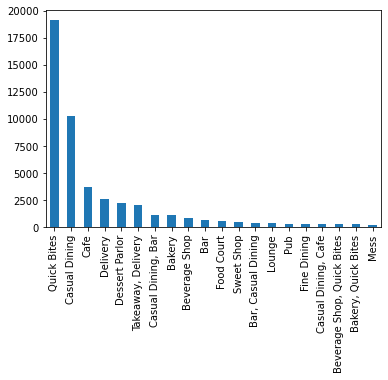

In [526]:
df['rest_type'].value_counts().nlargest(20).plot.bar()

#here we've nlargest(20) that means we only seleced 20 largest rest_type and we plotted a bar

<AxesSubplot:>

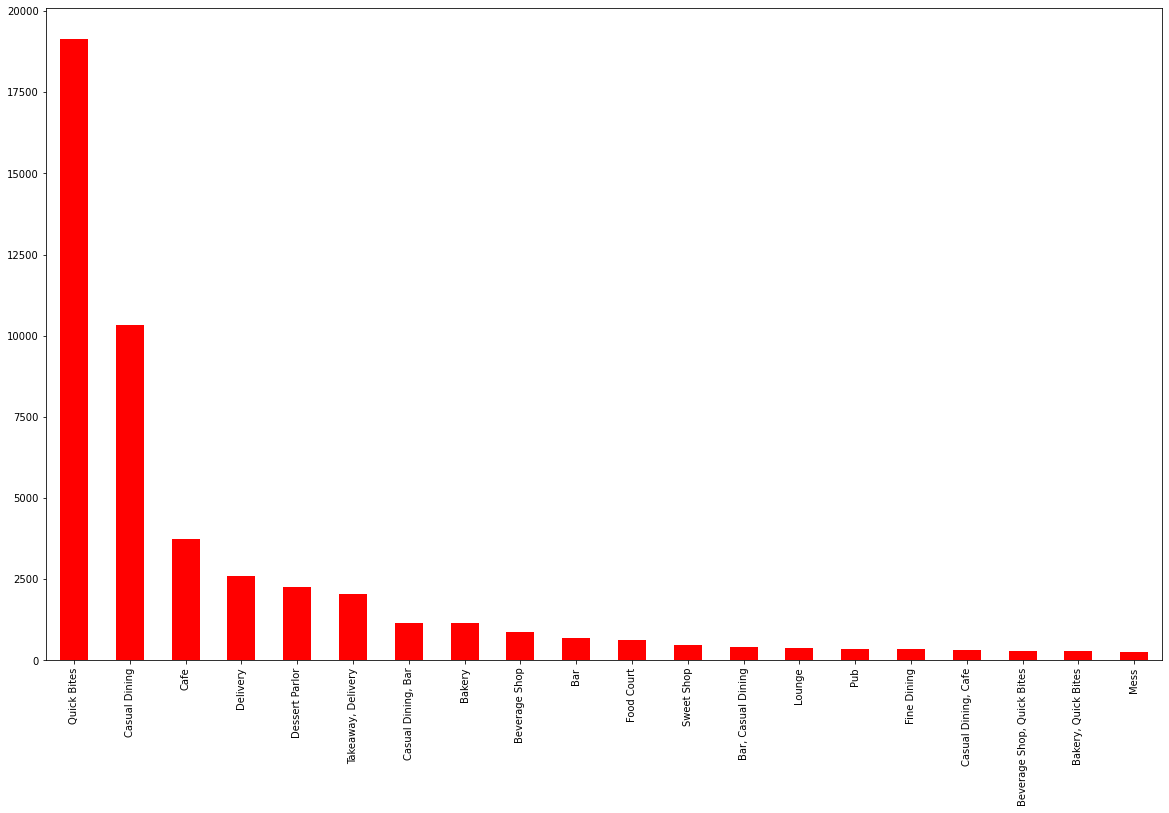

In [527]:
 # just changing apperance to look  good
    
    
plt.figure(figsize= (20,12))
df['rest_type'].value_counts().nlargest(20).plot.bar(color = 'red')


In [528]:
def mark(x):
    if x in ('Quick Bites','Casual Dining'):
        return 'Quick Bites + Casual Dining'
    else:
        return 'others'
df['Top_types'] = df['rest_type'].apply(mark)

In [529]:
df.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city),Top_types
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800.0,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari,Quick Bites + Casual Dining
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800.0,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari,Quick Bites + Casual Dining
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800.0,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari,others
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300.0,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari,Quick Bites + Casual Dining
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600.0,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari,Quick Bites + Casual Dining


In [530]:
!pip install plotly

In [531]:
import plotly.express as px

# plotly used for deployment level visualizations 

In [532]:
values = df['Top_types'].value_counts().values

values

# here we only took the values of top_types weather they are Quick Bites + Casual Dining' or  'others'

array([29462, 22255], dtype=int64)

In [533]:

labels = df['Top_types'].value_counts().index

labels

Index(['Quick Bites + Casual Dining', 'others'], dtype='object')

In [534]:
fig  = px.pie(df , names =labels , values = values  )
fig.show()

In [535]:
# From the pie chart we can definitely say 'Quick Bites & Casual Dining ' Restaurants are going to dominate in the city

In [536]:
# problem statement :
 # 1) Creating a new data frame in which we have votes,costs,and rating of the each restaurant
# 2)  Restaurant overview analysis

In [537]:
df.columns

Index(['url', 'address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'phone', 'location', 'rest_type', 'dish_liked', 'cuisines',
       'approx_cost(for two people)', 'reviews_list', 'menu_item',
       'listed_in(type)', 'listed_in(city)', 'Top_types'],
      dtype='object')

In [538]:
df.dtypes

url                             object
address                         object
name                            object
online_order                    object
book_table                      object
rate                           float64
votes                            int64
phone                           object
location                        object
rest_type                       object
dish_liked                      object
cuisines                        object
approx_cost(for two people)    float64
reviews_list                    object
menu_item                       object
listed_in(type)                 object
listed_in(city)                 object
Top_types                       object
dtype: object

In [539]:
df.groupby('name').agg({'votes':'sum', 'url':'count', 'approx_cost(for two people)':'mean','rate':'mean'})

# here we grouped the elements by the name , that means nothing but simply by alphabetic order of name and , 
#we aggregated the data that is corresponding to the name , we took the sum  for total votes , we took count for no of urls , 
# we took mean of cost of food for approx_cost  ,  and we took mean for average rating 

,votes,url,approx_cost(for two people),rate
name,,,,
#FeelTheROLL,14,2,200.0,3.400000
#L-81 Cafe,432,9,400.0,3.900000
#Vibes Restro,0,3,700.0,NaN
#refuel,111,3,400.0,3.700000
'Brahmins' Thatte Idli,0,1,100.0,NaN
...,...,...,...,...
late100,0,5,200.0,NaN
nu.tree,1443,8,400.0,4.314286
re:cess - Hilton Bangalore Embassy GolfLinks,438,3,1200.0,4.100000


In [540]:
# now we'ill assign it to new variable rest and provide some index values

rest = df.groupby('name').agg({'votes':'sum', 'url':'count', 'approx_cost(for two people)':'mean','rate':'mean'}).reset_index()


In [541]:
rest

,name,votes,url,approx_cost(for two people),rate
0,#FeelTheROLL,14,2,200.0,3.400000
1,#L-81 Cafe,432,9,400.0,3.900000
2,#Vibes Restro,0,3,700.0,NaN
3,#refuel,111,3,400.0,3.700000
4,'Brahmins' Thatte Idli,0,1,100.0,NaN
...,...,...,...,...,...
8787,late100,0,5,200.0,NaN
8788,nu.tree,1443,8,400.0,4.314286
8789,re:cess - Hilton Bangalore Embassy GolfLinks,438,3,1200.0,4.100000
8790,repEAT Hub,0,2,200.0,NaN


In [542]:
rest.columns = ['name','total_votes','total_unities','avg_approx_cost','mean_rating']

# we've changed the column names here for our rest

In [543]:
rest.head()

,name,total_votes,total_unities,avg_approx_cost,mean_rating
0,#FeelTheROLL,14,2,200.0,3.4
1,#L-81 Cafe,432,9,400.0,3.9
2,#Vibes Restro,0,3,700.0,NaN
3,#refuel,111,3,400.0,3.7
4,'Brahmins' Thatte Idli,0,1,100.0,NaN


In [544]:
rest['votes_per_unity'] = rest['total_votes']/rest['total_unities']

In [545]:
rest.head()

,name,total_votes,total_unities,avg_approx_cost,mean_rating,votes_per_unity
0,#FeelTheROLL,14,2,200.0,3.4,7.0
1,#L-81 Cafe,432,9,400.0,3.9,48.0
2,#Vibes Restro,0,3,700.0,NaN,0.0
3,#refuel,111,3,400.0,3.7,37.0
4,'Brahmins' Thatte Idli,0,1,100.0,NaN,0.0


In [546]:
# here we sorted the restaurants by total_unities it has and using false as ascending order it gives us des order.
# and we assigned it to the data frame popular .


popular  = rest.sort_values(by = 'total_unities' , ascending=False)
popular

,name,total_votes,total_unities,avg_approx_cost,mean_rating,votes_per_unity
1320,Cafe Coffee Day,3089,96,844.791667,3.147191,32.177083
5549,Onesta,347520,85,600.000000,4.410588,4088.470588
3788,Just Bake,2898,73,400.000000,3.355882,39.698630
2446,Empire Restaurant,229808,71,685.211268,3.916901,3236.732394
2577,Five Star Chicken,3134,70,257.857143,3.425000,44.771429
...,...,...,...,...,...,...
1900,Cool Break,11,1,150.000000,3.400000,11.000000
8076,The Shake Factory Originals,8,1,200.000000,3.300000,8.000000
5216,Nethravathi Military Hotel,0,1,200.000000,NaN,0.000000
7426,Swadisht North Indian Restaurant,23,1,200.000000,3.200000,23.000000


In [547]:
popular.shape

(8792, 6)

In [548]:
popular['name'].nunique()

8792

In [549]:
# by this we got to know that we've 8792 restaurants in city

In [550]:
# Restraunt overview analysis
# average votes received by the restaurant
# Top 5 most voted restaurants
# top 5 least voted restaurants

Text(0.5, 1.0, 'Top 5 least Restaurants')

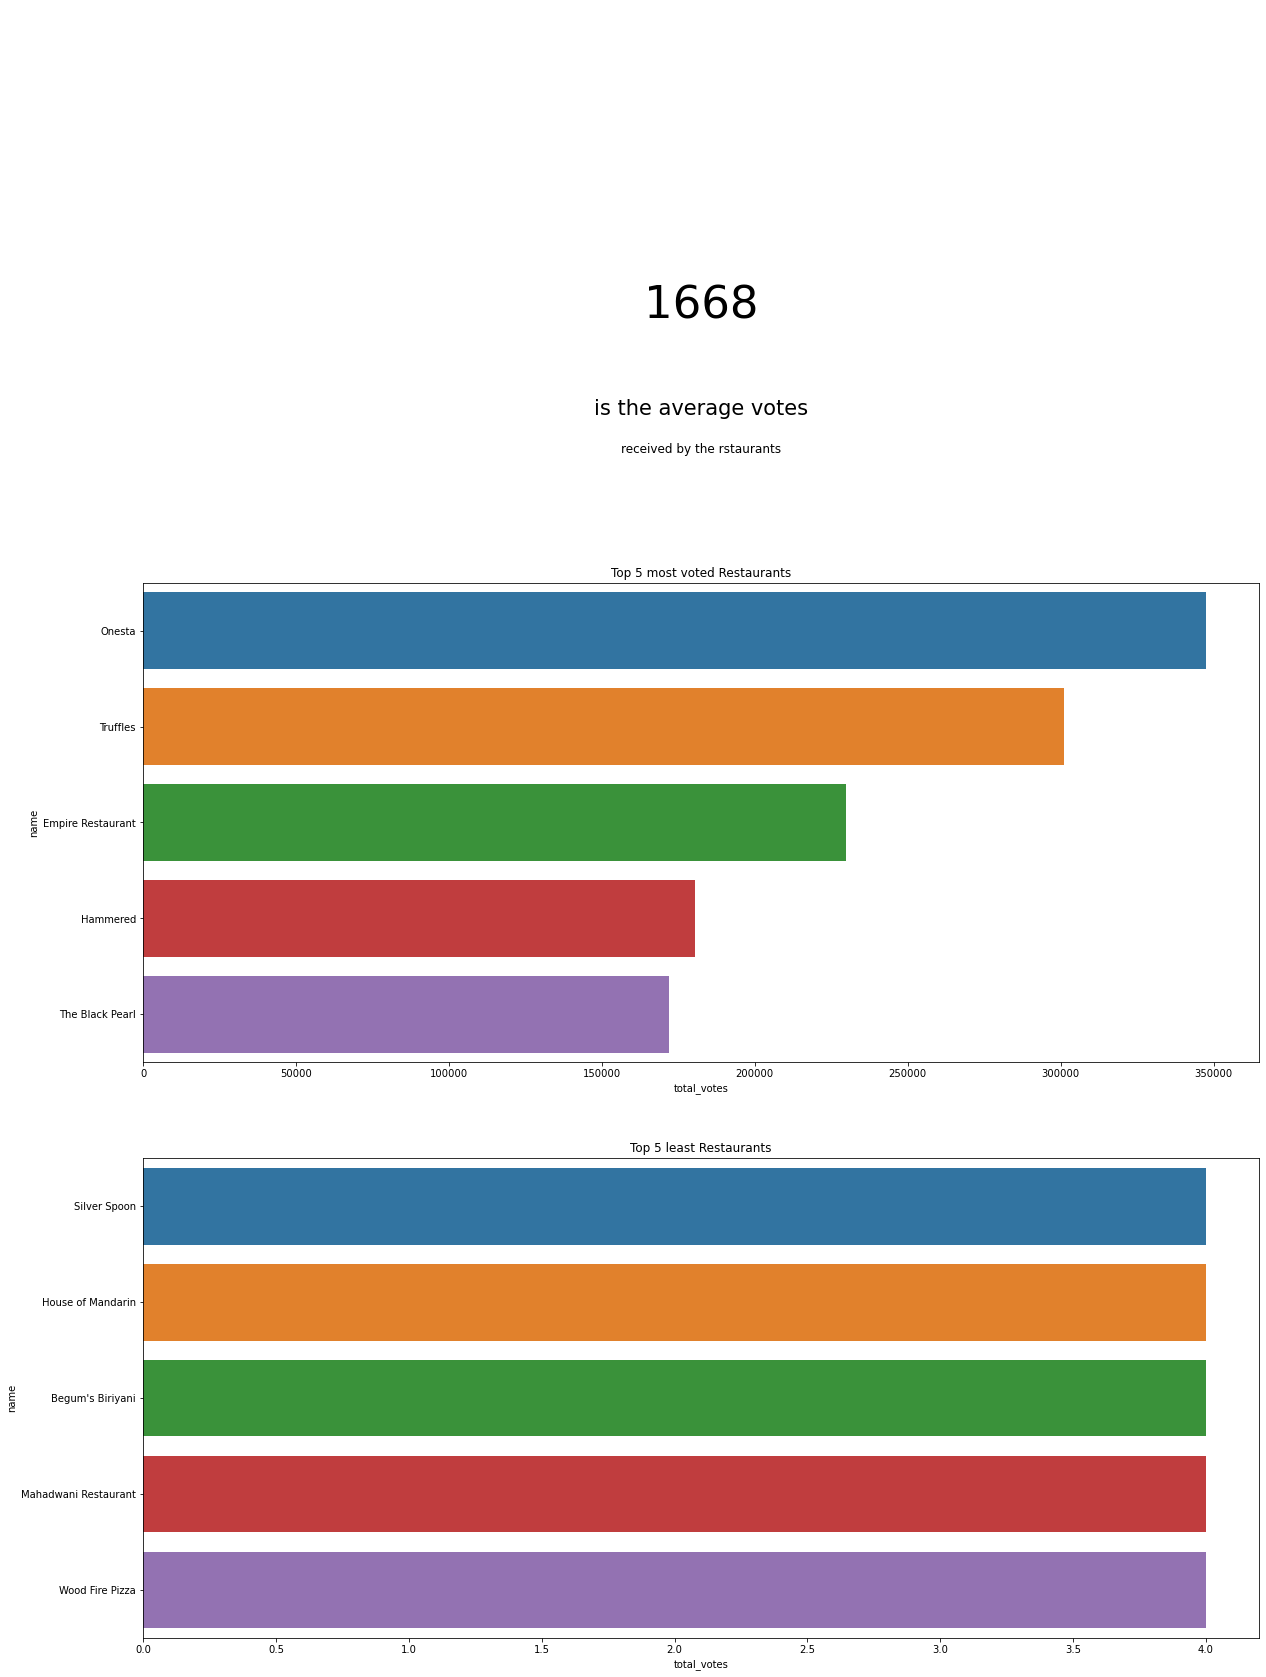

In [688]:
# for axis_1
# average votes received by the restaurant

fig , (ax1,ax2,ax3) = plt.subplots(3,1,figsize = (20,30))
ax1.text(0.50,0.35,int(popular['total_votes'].mean()),fontsize = 45, ha='center')
ax1.text(0.50,0.15, 'is the average votes' , fontsize  = 21 , ha = 'center')
ax1.text(0.50,0.07, 'received by the rstaurants' , fontsize  = 12, ha = 'center')

#we just remove axis
ax1.axis('off')

# for axis _2
# Top 5 most voted restaurants

sns.barplot(x ='total_votes',y= 'name', data = popular.sort_values(by= 'total_votes',ascending = False).query('total_votes>0').head(5),ax=ax2)
ax2.set_title('Top 5 most voted Restaurants')


# for axis_3

sns.barplot(x ='total_votes',y= 'name', data = popular.sort_values(by= 'total_votes',ascending = False).query('total_votes>0').tail(5),ax=ax3)
ax3.set_title('Top 5 least Restaurants')

In [552]:
# problem Statement :
 # 1) Analyzing most expensive & cheapest restaurants
 # 2) how many offer table book sevices and how many offer online orders
 # 3) c

Text(0.5, 1.0, 'Top 5 least expensive Restaurants')

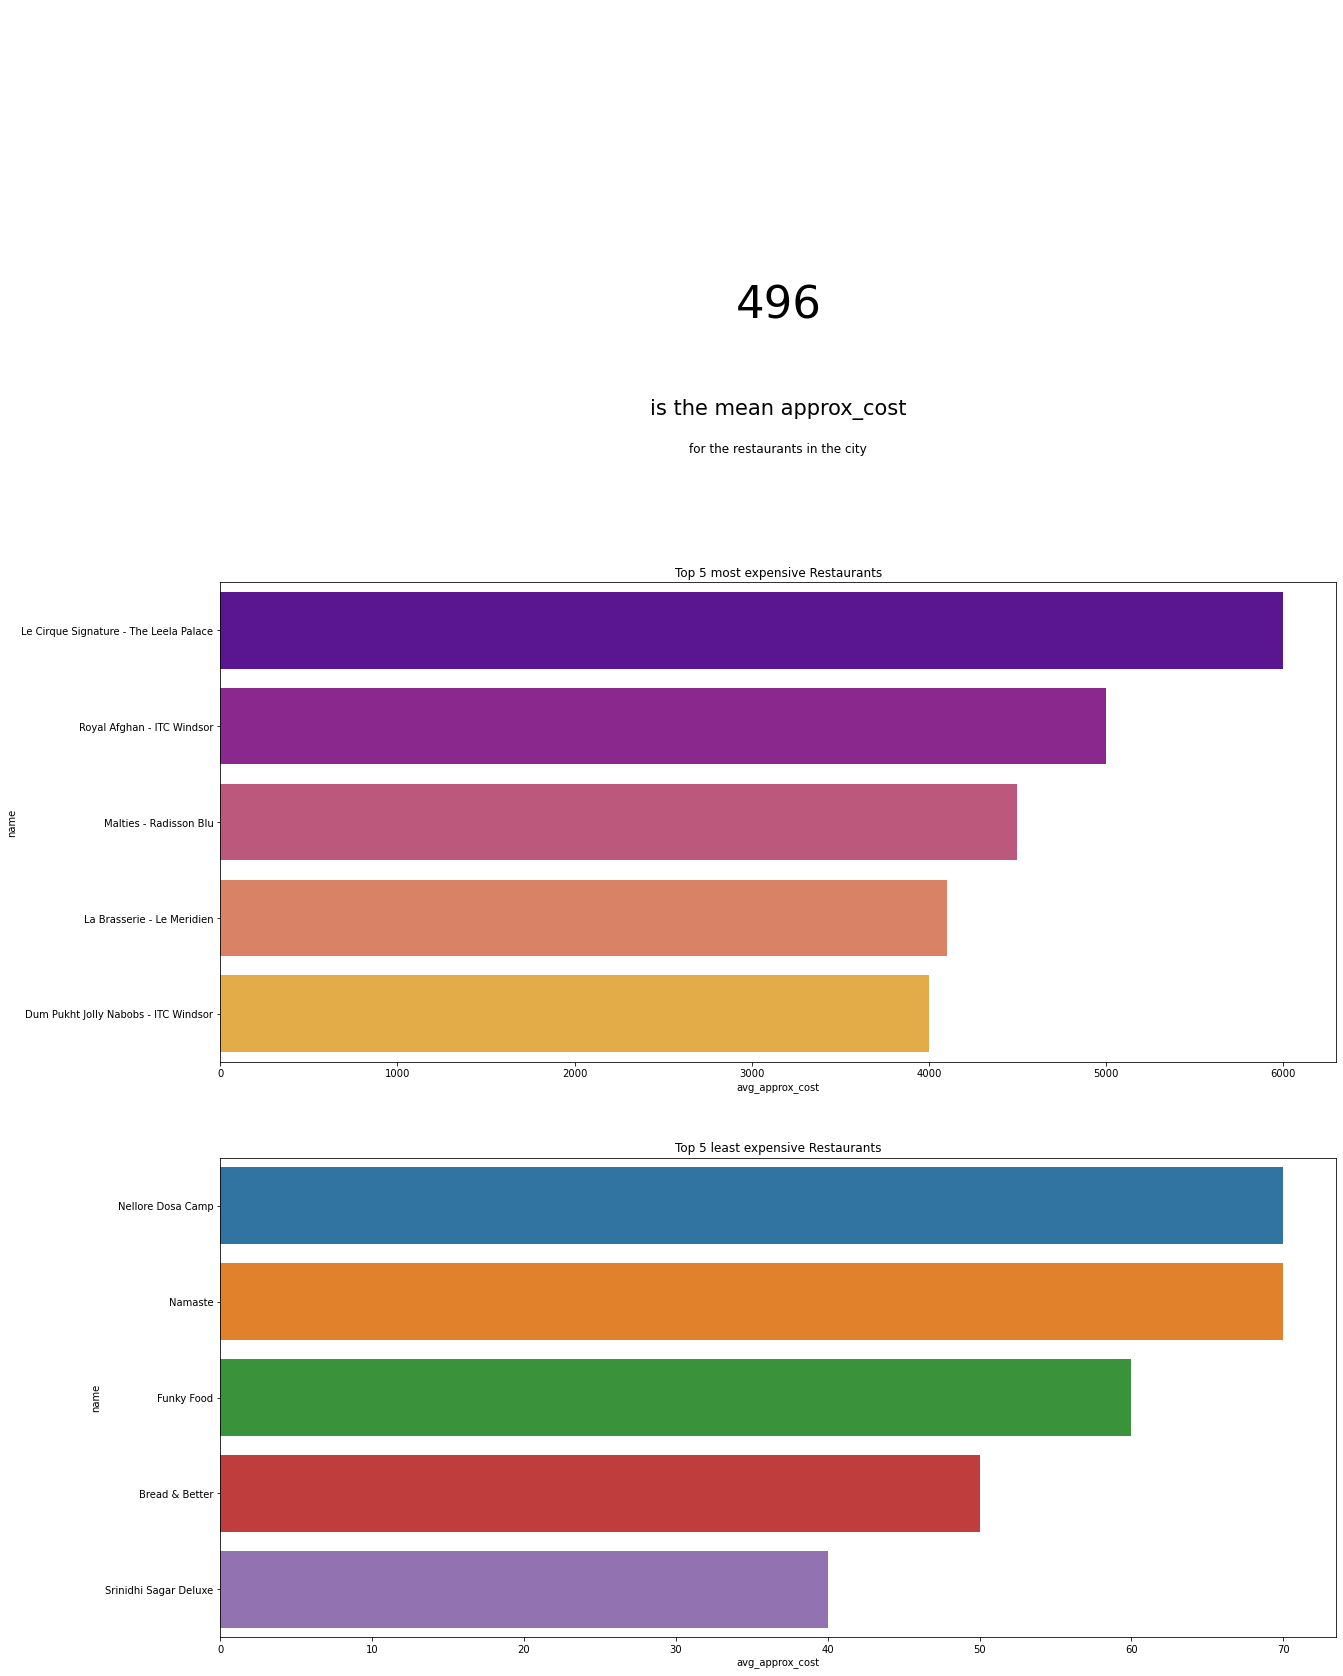

In [553]:
# for axis_1
# Analyzing most expensive & cheapest restaurants
#average approx cost

fig , (ax1,ax2,ax3) = plt.subplots(3,1,figsize = (20,30))
ax1.text(0.50,0.35,int(popular['avg_approx_cost'].mean()),fontsize = 45, ha='center')
ax1.text(0.50,0.15, 'is the mean approx_cost' , fontsize  = 21 , ha = 'center')
ax1.text(0.50,0.07, 'for the restaurants in the city' , fontsize  = 12, ha = 'center')

#we just remove axis
ax1.axis('off')

# for axis _2
#  top 5 most expensive

sns.barplot(x ='avg_approx_cost',y= 'name', data = popular.sort_values(by= 'avg_approx_cost',ascending = False).query('avg_approx_cost>0').head(5),ax=ax2,palette='plasma')
ax2.set_title('Top 5 most expensive Restaurants')


# for axis_3
# least expensive

sns.barplot(x ='avg_approx_cost',y= 'name', data = popular.sort_values(by= 'avg_approx_cost',ascending = False).query('avg_approx_cost>0').tail(5),ax=ax3)
ax3.set_title('Top 5 least expensive Restaurants')

In [554]:
df['book_table'].value_counts()

No     45268
Yes     6449
Name: book_table, dtype: int64

In [555]:
x1 = df['book_table'].value_counts()
labels  = ['not book','book']

In [556]:
fig1  = px.pie(df , names =labels , values = x1 )
fig1.show()


# here we just plotted pie to know how many restaurants have the table booking option

In [557]:
x2 = df['online_order'].value_counts()
labels  = ['acceptable','notacceptable']
fig2  = px.pie(df , names =labels , values = x2)
fig2.show()


# here we just plotted pie to know how many restaurants have the "online booking option"

In [558]:
# problem statement:
 # ) finding best budget restaurant in any location
# 2) How to extract latitudes and longitudes for any place

In [559]:
filter = (df['approx_cost(for two people)']<=400) & (df['location']=='BTM') &(df['rest_type']=='Quick Bites') & (df['rate']>=4)
budget = df[filter]

In [560]:
budget.head(3)


# here we created a filter that comprises of 
# a) approx_cost is less than or equalto 400, b)rest location is in btm, 3)rest type is Quick bites 
# d) and rating of rest is greater or equal to 4   and assigned to budget df

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city),Top_types
928,https://www.zomato.com/bangalore/hiyar-majhe-k...,"57/1, Near Alliance University, 19th Cross, 7t...",Hiyar Majhe Kolkata,Yes,No,4.0,244,+91 9108919806\r\r\n+91 9739059571,BTM,Quick Bites,"Radhaballavi, Biryani, Egg Noodles, Egg Roll, ...","Bengali, North Indian",400.0,"[('Rated 4.0', 'RATED\n I like this restauran...",[],Delivery,Bannerghatta Road,Quick Bites + Casual Dining
934,https://www.zomato.com/bangalore/swadista-aaha...,"947, 16th Main Road, 2nd Stage, BTM, Bangalore",Swadista Aahar,Yes,No,4.1,775,+91 9844006825\r\r\n+91 9844615361,BTM,Quick Bites,"Panneer Butter Masala, Idli, Masala Dosa, Vada...","South Indian, North Indian, Chinese, Street Food",300.0,"[('Rated 3.0', ""RATED\n Ordered south Indian ...",[],Delivery,Bannerghatta Road,Quick Bites + Casual Dining
940,https://www.zomato.com/bangalore/swad-punjab-d...,"324, 23rd Main, 3rd Cross, 2nd Stage, BTM, Ban...",Swad Punjab Da,Yes,No,4.0,126,+91 8360151853,BTM,Quick Bites,"Lassi, Roti, Veg Thali, Aloo Paratha, Egg Curry",North Indian,150.0,"[('Rated 4.0', 'RATED\n If you can visit and ...","['Dal with Sabji Combo', 'Dal Sabji with 4 Cha...",Delivery,Bannerghatta Road,Quick Bites + Casual Dining


In [561]:
budget['name'].unique()

array(['Hiyar Majhe Kolkata', 'Swadista Aahar', 'Swad Punjab Da',
       'Roti Wala', 'Litti Twist', 'The Shawarma Shop', 'Gorbandh',
       'Yum In My Tum', 'Nanna Munna Paratha House', 'Chaatimes',
       'Andhra Kitchen', "Muthashy's", 'Ashirvaad Grand', 'Petoo',
       'Ilyazsab The House Of Chicken', 'Kannur Food Point',
       "Domino's Pizza", 'KFC', 'Hari Super Sandwich',
       'The Biriyani Pedia', 'World Of Asia'], dtype=object)

In [562]:
def return_budget(location,restaurant_type):
    filter = (df['approx_cost(for two people)']<=400) & (df['location']==location) &(df['rest_type']==restaurant_type) & (df['rate']>=4)
    budget = df[filter]
    return (budget['name'].unique())

In [563]:
return_budget('BTM','Quick Bites')


# here we defined an function to return the bugdet restaurants in our given location and rest type

array(['Hiyar Majhe Kolkata', 'Swadista Aahar', 'Swad Punjab Da',
       'Roti Wala', 'Litti Twist', 'The Shawarma Shop', 'Gorbandh',
       'Yum In My Tum', 'Nanna Munna Paratha House', 'Chaatimes',
       'Andhra Kitchen', "Muthashy's", 'Ashirvaad Grand', 'Petoo',
       'Ilyazsab The House Of Chicken', 'Kannur Food Point',
       "Domino's Pizza", 'KFC', 'Hari Super Sandwich',
       'The Biriyani Pedia', 'World Of Asia'], dtype=object)

In [564]:
# extract latitudes and longitudes
# why lat and longitude ..?
#they are used to perform geographical analaysis ,spatial analysis
#for example we need to show where the highest rated location in map and etc...

In [565]:
df.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city),Top_types
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800.0,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari,Quick Bites + Casual Dining
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800.0,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari,Quick Bites + Casual Dining
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800.0,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari,others
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300.0,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari,Quick Bites + Casual Dining
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600.0,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari,Quick Bites + Casual Dining


In [566]:
#  #We  dont have anyn kind of latitude or longitude in our data , to get them we use geopy (geographical python)

In [567]:
    !pip install geopy


In [568]:
#  Nominatim = The Search (Nominatim) API is a tool used to search through
#  OpenStreetMap data by name and address, and vice versa (reverse geocoding).

from geopy.geocoders import Nominatim

In [569]:
geolocator = Nominatim(user_agent='app')

In [570]:
# for example
data = df['name'][0]
data

'Jalsa'

In [571]:
# we have name in string so we hve to change to get lat and lon

In [572]:
data  = geolocator.geocode(data)
data.latitude

12.9775851

In [573]:
data.longitude

77.6954241

In [574]:
# problem Statement :
# a) extract al latitudes and longitudes for the restau in the city
#  b) perform geographical analysis (spatial analysis) to know where the most rated restau are located


In [575]:
df.shape

(51717, 18)

In [576]:
df['location'].nunique()

93

In [577]:
df['location'].unique()

array(['Banashankari', 'Basavanagudi', 'Mysore Road', 'Jayanagar',
       'Kumaraswamy Layout', 'Rajarajeshwari Nagar', 'Vijay Nagar',
       'Uttarahalli', 'JP Nagar', 'South Bangalore', 'City Market',
       'Nagarbhavi', 'Bannerghatta Road', 'BTM', 'Kanakapura Road',
       'Bommanahalli', nan, 'CV Raman Nagar', 'Electronic City', 'HSR',
       'Marathahalli', 'Sarjapur Road', 'Wilson Garden', 'Shanti Nagar',
       'Koramangala 5th Block', 'Koramangala 8th Block', 'Richmond Road',
       'Koramangala 7th Block', 'Jalahalli', 'Koramangala 4th Block',
       'Bellandur', 'Whitefield', 'East Bangalore', 'Old Airport Road',
       'Indiranagar', 'Koramangala 1st Block', 'Frazer Town', 'RT Nagar',
       'MG Road', 'Brigade Road', 'Lavelle Road', 'Church Street',
       'Ulsoor', 'Residency Road', 'Shivajinagar', 'Infantry Road',
       'St. Marks Road', 'Cunningham Road', 'Race Course Road',
       'Commercial Street', 'Vasanth Nagar', 'HBR Layout', 'Domlur',
       'Ejipura', 'Jeevan 

In [578]:
locations = pd.DataFrame({'Name':df['location'].unique()})
locations
 # we created a data frame "locations" to show all the unique locations

,Name
0,Banashankari
1,Basavanagudi
2,Mysore Road
3,Jayanagar
4,Kumaraswamy Layout
...,...
89,West Bangalore
90,Magadi Road
91,Yelahanka
92,Sahakara Nagar


In [579]:
lat =[]
lon =[]
 
for location in locations['Name']:
        location  = geolocator.geocode(location)
        if location is None:
            lat.append(np.nan)
            lon.append(np.nan)
        else:
            lat.append(location.latitude)
            lon.append(location.longitude)
            

# here we created a for loop , that returns the latitude and logitude for each location in the locations data_frame,
# with a condition(if) , that returns 'nan' if the lat or lon values are not avaialable for any location.
        

In [580]:
locations['latitude']=lat
locations['longitude']=lon

# created 2 columns latitude and longitude and assigned lat and lon values to it in locations data frame.

In [581]:
locations.head()

,Name,latitude,longitude
0,Banashankari,15.887678,75.704678
1,Basavanagudi,12.941726,77.575502
2,Mysore Road,12.387214,76.666963
3,Jayanagar,27.643927,83.052805
4,Kumaraswamy Layout,12.908149,77.555318


In [582]:
Rest_locations  = df['location'].value_counts().reset_index()
Rest_locations.columns=['Name','Count']
Rest_locations

,Name,Count
0,BTM,5124
1,HSR,2523
2,Koramangala 5th Block,2504
3,JP Nagar,2235
4,Whitefield,2144
...,...,...
88,West Bangalore,6
89,Yelahanka,6
90,Jakkur,3
91,Rajarajeshwari Nagar,2


In [583]:
# merge both the data frames to get all the lat lon name and aslo the count

In [584]:
Restaurant_locations = Rest_locations.merge(locations,on='Name').dropna()
Restaurant_locations

,Name,Count,latitude,longitude
0,BTM,5124,45.954851,-112.496595
1,HSR,2523,18.147500,41.538889
2,Koramangala 5th Block,2504,12.934377,77.628415
3,JP Nagar,2235,12.265594,76.646540
4,Whitefield,2144,44.373058,-71.611858
...,...,...,...,...
88,West Bangalore,6,13.001129,77.632562
89,Yelahanka,6,13.100698,77.596345
90,Jakkur,3,13.078474,77.606894
91,Rajarajeshwari Nagar,2,12.927441,77.515522


In [585]:
# we'ill perform spatial analysis using heat map

In [586]:
!pip install folium

In [587]:
import folium
from folium.plugins import HeatMap

In [588]:
basemap = folium.Map(location=[12.97,77.59])
basemap

In [589]:
HeatMap(data=Restaurant_locations[['latitude','longitude','Count']]).add_to(basemap)

In [590]:
basemap

In [591]:
# problem statement :
#analyse the customer preference
#analysing the reviews on the particular rest

In [592]:
# we use wordcloud for this!
 #what is wordcloud....?
#   Word Cloud is a data visualization technique used for representing text data in which the size of each word
#    ,indicates its frequency or importance. Significant textual data points can be highlighted using a word cloud.
#    Word clouds are widely used for analyzing data from social network websites   
    

In [593]:
!pip install wordcloud

In [594]:
import wordcloud
from wordcloud import WordCloud,STOPWORDS

# STOPWORDS  is used to remove or ignore the basi words like is,are,the etc.....

In [595]:
data1 =  df[df['rest_type']=='Quick Bites']
data1.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city),Top_types
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300.0,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari,Quick Bites + Casual Dining
31,https://www.zomato.com/bangalore/foodiction-1-...,"2/1, 7th Main, Dwarakangar, Hosakeregalli, Ban...",Foodiction,Yes,No,2.8,506,+91 9916107070,Banashankari,Quick Bites,"Burgers, Lassi, Chicken Grill, Naan, Momos, Ch...","North Indian, Fast Food, Chinese, Burger",500.0,"[('Rated 1.0', ""RATED\n Worst restaurant ever...",[],Delivery,Banashankari,Quick Bites + Casual Dining
34,https://www.zomato.com/bangalore/faasos-banash...,"80, BDA Complex, 2nd Stage, Banashankari, Bang...",Faasos,Yes,No,4.2,415,+91 7700020020,Banashankari,Quick Bites,"Rolls, Veggie Wrap, Chocolate Fantasy, Rice Bo...","North Indian, Biryani, Fast Food",500.0,"[('Rated 3.0', 'RATED\n Not worth for the mon...","['Chole Kulcha Meal', 'Upvas Aloo Paratha With...",Delivery,Banashankari,Quick Bites + Casual Dining
36,https://www.zomato.com/bangalore/fast-and-fres...,"32, 7th Main Road, Dwaraka Nagar,Near PES Coll...",Fast And Fresh,Yes,No,2.8,91,+91 9742974232,Banashankari,Quick Bites,NaN,"North Indian, Chinese, Fast Food",400.0,"[('Rated 1.0', 'RATED\n Half baked rice in a ...",[],Delivery,Banashankari,Quick Bites + Casual Dining
39,https://www.zomato.com/bangalore/maruthi-davan...,"556/A, Water Tank Road, 3rd Stage, Banashankar...",Maruthi Davangere Benne Dosa,Yes,No,4.0,17,+91 9019563485,Banashankari,Quick Bites,NaN,South Indian,150.0,"[('Rated 5.0', ""RATED\n This restaurant serve...","['Benne Dosa', 'Benne Masala Dosa', 'Benne Kal...",Delivery,Banashankari,Quick Bites + Casual Dining


In [596]:
dishes =''
for word in data1['dish_liked'].dropna():
    words =word.split()
    for i in range(len(words)):
        words[i]=words[i].lower()
    dishes = dishes+' '.join(words)+' '
    
# here we created a for loop that spits the words  and used another for loop for making the words lowercase and joining the words
# and we used dropna to ignore the nan vaues


In [597]:
dishes

'masala dosa burgers, lassi, chicken grill, naan, momos, chicken burger, biryani rolls, veggie wrap, chocolate fantasy, rice bowls, chicken rice, paneer makhanwala, chicken tikka wrap dabeli, faluda, masala poori, sandwiches, tokri chaat, pav bhaji, dahipuri burgers, fries, hot chocolate pane pizza, lava cake, pasta, stuffed garlic bread, chocolava cake, tacos biryani paratha, pasta pasta, momos, rolls, chicken roll, chilli chicken, paneer roll, spaghetti grape juice, chicken grill, chicken tikka roll, shawarma roll, chicken shawarama, biryani combo, rolls vegetable biryani, ginger chicken, chicken biryani, donne biryani, chicken kebab, egg bhurji, dum biryani rolls, momos, fries, veggie roll, chicken kebab roll, paneer roll, cheese roll benne dosa, mirchi bajji, filter coffee, poha, tea, butter dosa, crispy dosa masala dosa panipuri, chaat, noodles, dahi bhalle rooftop ambience coffee, tea, kesari bath, open dosa, vada, idli, bread dosa masala dosa, tirupathi pongal, filter coffee, va

In [598]:
stopwords = set(STOPWORDS)

(-0.5, 1499.5, 1499.5, -0.5)

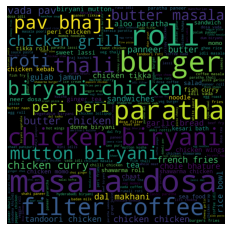

In [599]:
wordcloud = WordCloud(stopwords=stopwords,width=1500,height=1500).generate(dishes)
plt.imshow(wordcloud)
plt.axis('off')

# here we plotted wordcount , fro that we can easily know which foods are most preferred by the customers in the city

In [600]:
# problem statement :
 # analysing reviews of the particular restaurant

In [601]:
data2 = df['reviews_list'][0]
data2

'[(\'Rated 4.0\', \'RATED\\n  A beautiful place to dine in.The interiors take you back to the Mughal era. The lightings are just perfect.We went there on the occasion of Christmas and so they had only limited items available. But the taste and service was not compromised at all.The only complaint is that the breads could have been better.Would surely like to come here again.\'), (\'Rated 4.0\', \'RATED\\n  I was here for dinner with my family on a weekday. The restaurant was completely empty. Ambience is good with some good old hindi music. Seating arrangement are good too. We ordered masala papad, panner and baby corn starters, lemon and corrionder soup, butter roti, olive and chilli paratha. Food was fresh and good, service is good too. Good for family hangout.\\nCheers\'), (\'Rated 2.0\', \'RATED\\n  Its a restaurant near to Banashankari BDA. Me along with few of my office friends visited to have buffet but unfortunately they only provide veg buffet. On inquiring they said this plac

In [602]:
data2 = data2.lower()

#we use re here
#Regular Expression Syntax.
#  A regular expression (or RE) specifies a set of strings that matches it;
#  the functions in this module let you check, 
#   if a particular string matches a given regular expression 
#    (or if a given regular expression matches a particular string, which comes down to the same thing).

In [603]:
import re

In [604]:
data3 = re.sub('[^a-zA-Z]',' ',data2)
data3

# here using re , we only included letters from a-z , igored special characters and replaced with space

'   rated        rated n  a beautiful place to dine in the interiors take you back to the mughal era  the lightings are just perfect we went there on the occasion of christmas and so they had only limited items available  but the taste and service was not compromised at all the only complaint is that the breads could have been better would surely like to come here again       rated        rated n  i was here for dinner with my family on a weekday  the restaurant was completely empty  ambience is good with some good old hindi music  seating arrangement are good too  we ordered masala papad  panner and baby corn starters  lemon and corrionder soup  butter roti  olive and chilli paratha  food was fresh and good  service is good too  good for family hangout  ncheers      rated        rated n  its a restaurant near to banashankari bda  me along with few of my office friends visited to have buffet but unfortunately they only provide veg buffet  on inquiring they said this place is mostly vis

In [605]:
data4 = re.sub('rated',' ',data3)
data4

'              n  a beautiful place to dine in the interiors take you back to the mughal era  the lightings are just perfect we went there on the occasion of christmas and so they had only limited items available  but the taste and service was not compromised at all the only complaint is that the breads could have been better would surely like to come here again                  n  i was here for dinner with my family on a weekday  the restaurant was completely empty  ambience is good with some good old hindi music  seating arrangement are good too  we ordered masala papad  panner and baby corn starters  lemon and corrionder soup  butter roti  olive and chilli paratha  food was fresh and good  service is good too  good for family hangout  ncheers                 n  its a restaurant near to banashankari bda  me along with few of my office friends visited to have buffet but unfortunately they only provide veg buffet  on inquiring they said this place is mostly visited by vegetarians  any

In [606]:
data5 = re.sub('x',' ',data4)
data5

'              n  a beautiful place to dine in the interiors take you back to the mughal era  the lightings are just perfect we went there on the occasion of christmas and so they had only limited items available  but the taste and service was not compromised at all the only complaint is that the breads could have been better would surely like to come here again                  n  i was here for dinner with my family on a weekday  the restaurant was completely empty  ambience is good with some good old hindi music  seating arrangement are good too  we ordered masala papad  panner and baby corn starters  lemon and corrionder soup  butter roti  olive and chilli paratha  food was fresh and good  service is good too  good for family hangout  ncheers                 n  its a restaurant near to banashankari bda  me along with few of my office friends visited to have buffet but unfortunately they only provide veg buffet  on inquiring they said this place is mostly visited by vegetarians  any

In [607]:
data6 = re.sub(' +',' ',data5)
data6

' n a beautiful place to dine in the interiors take you back to the mughal era the lightings are just perfect we went there on the occasion of christmas and so they had only limited items available but the taste and service was not compromised at all the only complaint is that the breads could have been better would surely like to come here again n i was here for dinner with my family on a weekday the restaurant was completely empty ambience is good with some good old hindi music seating arrangement are good too we ordered masala papad panner and baby corn starters lemon and corrionder soup butter roti olive and chilli paratha food was fresh and good service is good too good for family hangout ncheers n its a restaurant near to banashankari bda me along with few of my office friends visited to have buffet but unfortunately they only provide veg buffet on inquiring they said this place is mostly visited by vegetarians anyways we ordered ala carte items which took ages to come food was o

In [608]:
dataset = df[df['rest_type']=='Quick Bites']

In [609]:
dataset.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city),Top_types
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300.0,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari,Quick Bites + Casual Dining
31,https://www.zomato.com/bangalore/foodiction-1-...,"2/1, 7th Main, Dwarakangar, Hosakeregalli, Ban...",Foodiction,Yes,No,2.8,506,+91 9916107070,Banashankari,Quick Bites,"Burgers, Lassi, Chicken Grill, Naan, Momos, Ch...","North Indian, Fast Food, Chinese, Burger",500.0,"[('Rated 1.0', ""RATED\n Worst restaurant ever...",[],Delivery,Banashankari,Quick Bites + Casual Dining
34,https://www.zomato.com/bangalore/faasos-banash...,"80, BDA Complex, 2nd Stage, Banashankari, Bang...",Faasos,Yes,No,4.2,415,+91 7700020020,Banashankari,Quick Bites,"Rolls, Veggie Wrap, Chocolate Fantasy, Rice Bo...","North Indian, Biryani, Fast Food",500.0,"[('Rated 3.0', 'RATED\n Not worth for the mon...","['Chole Kulcha Meal', 'Upvas Aloo Paratha With...",Delivery,Banashankari,Quick Bites + Casual Dining
36,https://www.zomato.com/bangalore/fast-and-fres...,"32, 7th Main Road, Dwaraka Nagar,Near PES Coll...",Fast And Fresh,Yes,No,2.8,91,+91 9742974232,Banashankari,Quick Bites,NaN,"North Indian, Chinese, Fast Food",400.0,"[('Rated 1.0', 'RATED\n Half baked rice in a ...",[],Delivery,Banashankari,Quick Bites + Casual Dining
39,https://www.zomato.com/bangalore/maruthi-davan...,"556/A, Water Tank Road, 3rd Stage, Banashankar...",Maruthi Davangere Benne Dosa,Yes,No,4.0,17,+91 9019563485,Banashankari,Quick Bites,NaN,South Indian,150.0,"[('Rated 5.0', ""RATED\n This restaurant serve...","['Benne Dosa', 'Benne Masala Dosa', 'Benne Kal...",Delivery,Banashankari,Quick Bites + Casual Dining


In [610]:
# now for the dataset dataframe we'll perform all the RE which we have only done for a singl restaurant

In [611]:
total_review =' '
for review in dataset['reviews_list']:
    review = review.lower()
    review = re.sub('[^a-zA-Z]',' ',review)
    review = re.sub('rated',' ',review)
    review = re.sub('x',' ',review)
    review = re.sub(' +',' ',review)
    total_review =total_review + str(review)

(-0.5, 1499.5, 1499.5, -0.5)

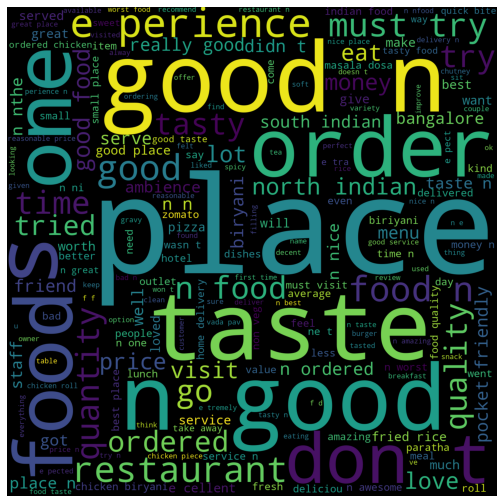

In [612]:
wordcloud2 = WordCloud(stopwords=stopwords,width=1500,height=1500).generate(total_review)
plt.figure(figsize=(15,9))
plt.imshow(wordcloud2)
plt.axis('off')



In [613]:
#problem statement :
#  Preparing data for the modelling purpose
#  create a target variable

In [614]:
df.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city),Top_types
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800.0,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari,Quick Bites + Casual Dining
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800.0,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari,Quick Bites + Casual Dining
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800.0,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari,others
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300.0,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari,Quick Bites + Casual Dining
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600.0,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari,Quick Bites + Casual Dining


In [615]:
# we first create another data frame df2
# new_rest (variable) <--- rating==0
# coz we ill use only the rest ratigs greaer than zero
# so,
# train_val_rest > 0 ----ML model

In [616]:
def assign(x):
    if x>0:
       return 1
    else:
       return 0

In [617]:
df['rated'] = df['rate'].apply(assign)

In [618]:
df.columns

# here we created a function that returns when the rate of restau as 1 if the rating is greater than 1 , else 0
# and assigned to new feature rated

Index(['url', 'address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'phone', 'location', 'rest_type', 'dish_liked', 'cuisines',
       'approx_cost(for two people)', 'reviews_list', 'menu_item',
       'listed_in(type)', 'listed_in(city)', 'Top_types', 'rated'],
      dtype='object')

In [619]:
df['rated'].unique()

array([1, 0], dtype=int64)

In [620]:
new_restaurants = df[df['rated']==0]

In [621]:
train_val_rest =df.query("rated==1")


# here we created to two df's ....we use train_val_rest for training the model coz we assigned only the restau hve rating as 1
# we assigned the 0 to the new_restaurants

In [622]:
train_val_rest.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city),Top_types,rated
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800.0,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari,Quick Bites + Casual Dining,1
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800.0,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari,Quick Bites + Casual Dining,1
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800.0,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari,others,1
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300.0,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari,Quick Bites + Casual Dining,1
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600.0,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari,Quick Bites + Casual Dining,1


In [623]:
train_val_rest['rate'].unique()

array([4.1, 3.8, 3.7, 3.6, 4.6, 4. , 4.2, 3.9, 3.1, 3. , 3.2, 3.3, 2.8,
       4.4, 4.3, 2.9, 3.5, 2.6, 3.4, 4.5, 2.5, 2.7, 4.7, 2.4, 2.2, 2.3,
       4.8, 4.9, 2.1, 2. , 1.8])

In [624]:
# creatin the target feature

In [625]:
#zomato
# now will give some condition
# if rest_ratings < 3.75 -- its bad rest for example -- will assign 0
# if rest_ratings > 3.75 -- its good rest  -- will assign 1

In [626]:
threshold = 3.75
train_val_rest['target'] = train_val_rest['rate'].apply(lambda x:1 if x>threshold else 0)

# here we've used lamba insted of a function, we've given threshold value as 3.75

# so if the rate is less that 3.75 its 0 else its 1

<ipython-input-626-d12263308235>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [627]:
train_val_rest.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city),Top_types,rated,target
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800.0,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari,Quick Bites + Casual Dining,1,1
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800.0,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari,Quick Bites + Casual Dining,1,1
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800.0,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari,others,1,1
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300.0,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari,Quick Bites + Casual Dining,1,0
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600.0,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari,Quick Bites + Casual Dining,1,1


In [628]:
x =train_val_rest['target'].value_counts()
x

0    21421
1    20244
Name: target, dtype: int64

In [629]:
labels = x.index
labels

Int64Index([0, 1], dtype='int64')

([<matplotlib.patches.Wedge at 0x2f75faf0310>,
 [Text(-0.04879500100763322, 1.0989172161162393, '0'),
  Text(0.04879500100763285, -1.0989172161162393, '1')])

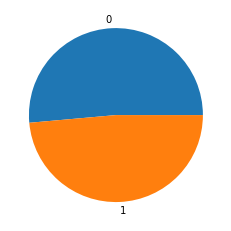

In [630]:
plt.pie(x,labels=labels)

# here we can see there is no imbalance of the data so we can proceed

In [631]:
df.columns

Index(['url', 'address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'phone', 'location', 'rest_type', 'dish_liked', 'cuisines',
       'approx_cost(for two people)', 'reviews_list', 'menu_item',
       'listed_in(type)', 'listed_in(city)', 'Top_types', 'rated'],
      dtype='object')

In [632]:
df['cuisines'][0]

'North Indian, Mughlai, Chinese'

In [633]:
df['cuisines'][0].split(',')

['North Indian', ' Mughlai', ' Chinese']

In [634]:
len(df['cuisines'][0].split(','))

3

In [635]:
# here we took the cuisines feature and splitted it using ',' and using len fuction we can easily know how many tpye of cuisines are there in that particular restaurant

In [636]:
def count(x):
    return len(x.split(','))

# function to return the no.of cuisines in that particular restaurant
    

In [637]:
train_val_rest['total_cuisines'] = train_val_rest['cuisines'].astype(str).apply(count)

<ipython-input-637-9b13501f6742>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [638]:
train_val_rest.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,...,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city),Top_types,rated,target,total_cuisines
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,...,"North Indian, Mughlai, Chinese",800.0,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari,Quick Bites + Casual Dining,1,1,3
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1,787,080 41714161,Banashankari,Casual Dining,...,"Chinese, North Indian, Thai",800.0,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari,Quick Bites + Casual Dining,1,1,3
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8,918,+91 9663487993,Banashankari,"Cafe, Casual Dining",...,"Cafe, Mexican, Italian",800.0,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari,others,1,1,3
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7,88,+91 9620009302,Banashankari,Quick Bites,...,"South Indian, North Indian",300.0,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari,Quick Bites + Casual Dining,1,0,2
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,...,"North Indian, Rajasthani",600.0,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari,Quick Bites + Casual Dining,1,1,2


In [639]:
# well do the same abovefor the type of rest and count it

In [640]:
train_val_rest['multiple_types'] = train_val_rest['rest_type'].astype(str).apply(count)

<ipython-input-640-d7f7c576e4f8>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [641]:
train_val_rest.head(3)

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,...,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city),Top_types,rated,target,total_cuisines,multiple_types
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,...,800.0,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari,Quick Bites + Casual Dining,1,1,3,1
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1,787,080 41714161,Banashankari,Casual Dining,...,800.0,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari,Quick Bites + Casual Dining,1,1,3,1
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8,918,+91 9663487993,Banashankari,"Cafe, Casual Dining",...,800.0,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari,others,1,1,3,2


In [642]:
train_val_rest.columns


Index(['url', 'address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'phone', 'location', 'rest_type', 'dish_liked', 'cuisines',
       'approx_cost(for two people)', 'reviews_list', 'menu_item',
       'listed_in(type)', 'listed_in(city)', 'Top_types', 'rated', 'target',
       'total_cuisines', 'multiple_types'],
      dtype='object')

In [643]:
# now we only consider the features that are useful for our model aslo we choose based on our business requirement
# and we consider them as our independent variables and we'll assign them to a new data frame df2

In [644]:
imp_features = ['online_order', 'book_table',  'location', 'rest_type', 'approx_cost(for two people)', 
                'listed_in(type)', 'listed_in(city)',   'target',
       'total_cuisines', 'multiple_types']

In [645]:
df2 = train_val_rest[imp_features]

In [646]:
df2.shape

(41665, 10)

In [647]:
df2.head()

,online_order,book_table,location,rest_type,approx_cost(for two people),listed_in(type),listed_in(city),target,total_cuisines,multiple_types
0,Yes,Yes,Banashankari,Casual Dining,800.0,Buffet,Banashankari,1,3,1
1,Yes,No,Banashankari,Casual Dining,800.0,Buffet,Banashankari,1,3,1
2,Yes,No,Banashankari,"Cafe, Casual Dining",800.0,Buffet,Banashankari,1,3,2
3,No,No,Banashankari,Quick Bites,300.0,Buffet,Banashankari,0,2,1
4,No,No,Basavanagudi,Casual Dining,600.0,Buffet,Banashankari,1,2,1


In [648]:
# missig values imputation

In [649]:
df2.isnull().sum()

online_order                     0
book_table                       0
location                         0
rest_type                      149
approx_cost(for two people)    247
listed_in(type)                  0
listed_in(city)                  0
target                           0
total_cuisines                   0
multiple_types                   0
dtype: int64

In [650]:
df2.dropna(how='any',inplace=True)

<ipython-input-650-eadec5207cc9>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [651]:
df2.isnull().sum()

online_order                   0
book_table                     0
location                       0
rest_type                      0
approx_cost(for two people)    0
listed_in(type)                0
listed_in(city)                0
target                         0
total_cuisines                 0
multiple_types                 0
dtype: int64

In [652]:
df2.shape


(41271, 10)

In [653]:
df2.dtypes

online_order                    object
book_table                      object
location                        object
rest_type                       object
approx_cost(for two people)    float64
listed_in(type)                 object
listed_in(city)                 object
target                           int64
total_cuisines                   int64
multiple_types                   int64
dtype: object

In [654]:
#Separate categorical and numerical features

In [655]:
cate_features = [col for col in df2.columns if df2[col].dtype == 'O']
cate_features

['online_order',
 'book_table',
 'location',
 'rest_type',
 'listed_in(type)',
 'listed_in(city)']

In [656]:
nume_features = [col for col in df2.columns if df2[col].dtype!= 'O']
nume_features

['approx_cost(for two people)', 'target', 'total_cuisines', 'multiple_types']

In [657]:
for feature in cate_features:
    print('{} has total {} unique features'.format(feature,df2[feature].nunique()))

online_order has total 2 unique features
book_table has total 2 unique features
location has total 92 unique features
rest_type has total 87 unique features
listed_in(type) has total 7 unique features
listed_in(city) has total 30 unique features


In [658]:
# feature encoding

# we apply feature encoding for the location variable which has 92 unique values

In [659]:
df2[cate_features].head()

,online_order,book_table,location,rest_type,listed_in(type),listed_in(city)
0,Yes,Yes,Banashankari,Casual Dining,Buffet,Banashankari
1,Yes,No,Banashankari,Casual Dining,Buffet,Banashankari
2,Yes,No,Banashankari,"Cafe, Casual Dining",Buffet,Banashankari
3,No,No,Banashankari,Quick Bites,Buffet,Banashankari
4,No,No,Basavanagudi,Casual Dining,Buffet,Banashankari


In [660]:
df2[cate_features].nunique()


# here location changed to '47' after feature encoding ..before it was '92'

online_order        2
book_table          2
location           92
rest_type          87
listed_in(type)     7
listed_in(city)    30
dtype: int64

In [661]:
df2['location'].nunique()

92

In [662]:
df2['location'].value_counts()

BTM                      3879
Koramangala 5th Block    2297
HSR                      1993
Indiranagar              1800
JP Nagar                 1710
                         ... 
Yelahanka                   4
West Bangalore              3
Rajarajeshwari Nagar        2
Nagarbhavi                  1
Peenya                      1
Name: location, Length: 92, dtype: int64

In [663]:
values2  = (df2['location'].value_counts()/len(df2))*100
values2

BTM                      9.398851
Koramangala 5th Block    5.565651
HSR                      4.829057
Indiranagar              4.361416
JP Nagar                 4.143345
                           ...   
Yelahanka                0.009692
West Bangalore           0.007269
Rajarajeshwari Nagar     0.004846
Nagarbhavi               0.002423
Peenya                   0.002423
Name: location, Length: 92, dtype: float64

In [664]:
# here we can notice that BTM is the dominant and has 9% ..comming to last variables they have appro equal to 0.%
# so , taking a desicion from the domain expert weather to include or not.. we can move the 0 % as another category

# now we'll write a function

In [665]:
threshold = 0.4

imp2= values2[values2>threshold]
imp2

BTM                      9.398851
Koramangala 5th Block    5.565651
HSR                      4.829057
Indiranagar              4.361416
JP Nagar                 4.143345
Jayanagar                3.959197
Whitefield               3.808970
Marathahalli             3.416443
Bannerghatta Road        2.970609
Koramangala 7th Block    2.556274
Koramangala 6th Block    2.553851
Brigade Road             2.549005
Bellandur                2.415740
Sarjapur Road            2.069250
Koramangala 1st Block    2.064404
Ulsoor                   2.057135
Koramangala 4th Block    2.037750
Electronic City          2.020789
MG Road                  1.921446
Banashankari             1.802719
Kalyan Nagar             1.681568
Malleshwaram             1.553149
Richmond Road            1.463497
Residency Road           1.463497
Basavanagudi             1.441690
Frazer Town              1.371423
Church Street            1.322963
Brookefield              1.315694
New BEL Road             1.226042
Kammanahalli  

In [666]:
imp2.nunique()

# previouslt we hve 92 categories in location , then we only considered the imp location here  i.e 45

45

In [667]:
df2['location'] = np.where(df2['location'].isin(imp2.index),df2['location'],'others')
df2['location']


# here we used where loop that gives 'location name' when it is in imp2(which has location>0.4)..else if the location is not
# in imp2 , it will print as others.

<ipython-input-667-48bb3cf784e3>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



0        Banashankari
1        Banashankari
2        Banashankari
3        Banashankari
4        Basavanagudi
             ...     
51709      Whitefield
51711      Whitefield
51712      Whitefield
51715          others
51716          others
Name: location, Length: 41271, dtype: object

In [668]:
df2['location'].nunique()

47

In [669]:
# we apply feature encoding for the rest_type variable which has 92 unique values

In [670]:
values3  = (df2['rest_type'].value_counts()/len(df2))*100
values3

Quick Bites              33.643478
Casual Dining            23.299654
Cafe                      8.163117
Dessert Parlor            4.482566
Delivery                  4.048848
                           ...    
Bakery, Food Court        0.004846
Cafe, Food Court          0.004846
Dessert Parlor, Kiosk     0.004846
Quick Bites, Kiosk        0.002423
Bakery, Beverage Shop     0.002423
Name: rest_type, Length: 87, dtype: float64

In [671]:
threshold = 1.5

imp3= values3[values3>threshold]
imp3

Quick Bites           33.643478
Casual Dining         23.299654
Cafe                   8.163117
Dessert Parlor         4.482566
Delivery               4.048848
Takeaway, Delivery     3.099028
Casual Dining, Bar     2.645926
Bakery                 1.705798
Beverage Shop          1.555572
Bar                    1.550726
Name: rest_type, dtype: float64

In [672]:
len(imp3)

# at first we have 87 values in the rest_type feature .. now after feature encoding we got 10.

10

In [673]:
df2['rest_type'].head(20)

0           Casual Dining
1           Casual Dining
2     Cafe, Casual Dining
3             Quick Bites
4           Casual Dining
5           Casual Dining
6           Casual Dining
7     Casual Dining, Cafe
8                    Cafe
9                    Cafe
10                   Cafe
11                   Cafe
12                   Cafe
13                   Cafe
14    Cafe, Casual Dining
15                   Cafe
16                   Cafe
17                   Cafe
18                   Cafe
19                   Cafe
Name: rest_type, dtype: object

In [674]:
df2['rest_type'] = np.where(df2['rest_type'].isin(imp3.index),df2['rest_type'],'others')
df2['rest_type'].head(20)

# here we considered cafe , casual dining as others using where loop , because cafe,casual dining is not in our imp3 list

<ipython-input-674-ecc88122f711>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



0     Casual Dining
1     Casual Dining
2            others
3       Quick Bites
4     Casual Dining
5     Casual Dining
6     Casual Dining
7            others
8              Cafe
9              Cafe
10             Cafe
11             Cafe
12             Cafe
13             Cafe
14           others
15             Cafe
16             Cafe
17             Cafe
18             Cafe
19             Cafe
Name: rest_type, dtype: object

In [675]:
# now after all the feature encoding , check the reduced unique values

for feature in cate_features:
    print('{} has total {} unique features'.format(feature,df2[feature].nunique()))

online_order has total 2 unique features
book_table has total 2 unique features
location has total 47 unique features
rest_type has total 11 unique features
listed_in(type) has total 7 unique features
listed_in(city) has total 30 unique features


In [676]:
# we'ill perform onehot encoding

In [677]:
# what is one hot encoding..?
#   onehot encoding is nothing but variable tranformation...for instance in online_order(we have two categories 'yes' or 'no'),
# so ,using one hot encoding will assign 0 & 1...nothing but we'll change it to int so that we can apply ML model

In [678]:
data_cate = df2[cate_features]
data_cate


,online_order,book_table,location,rest_type,listed_in(type),listed_in(city)
0,Yes,Yes,Banashankari,Casual Dining,Buffet,Banashankari
1,Yes,No,Banashankari,Casual Dining,Buffet,Banashankari
2,Yes,No,Banashankari,others,Buffet,Banashankari
3,No,No,Banashankari,Quick Bites,Buffet,Banashankari
4,No,No,Basavanagudi,Casual Dining,Buffet,Banashankari
...,...,...,...,...,...,...
51709,No,No,Whitefield,"Casual Dining, Bar",Pubs and bars,Whitefield
51711,No,No,Whitefield,"Casual Dining, Bar",Pubs and bars,Whitefield
51712,No,No,Whitefield,Bar,Pubs and bars,Whitefield
51715,No,Yes,others,Bar,Pubs and bars,Whitefield


In [679]:
cate_features

['online_order',
 'book_table',
 'location',
 'rest_type',
 'listed_in(type)',
 'listed_in(city)']

In [680]:
# now we'll use get.dummies for onehot encoding

In [681]:
for col in cate_features:
    col_encoded = pd.get_dummies(data_cate[col],prefix=col,drop_first=True)
    data_cate =pd.concat([data_cate,col_encoded], axis =1)
 
    data_cate.drop(col,axis=1,inplace=True) #here we just dropped the col with names .
     
    

In [685]:
data_cate.head()

,online_order_Yes,book_table_Yes,location_Banashankari,location_Banaswadi,location_Bannerghatta Road,location_Basavanagudi,location_Bellandur,location_Brigade Road,location_Brookefield,location_Church Street,...,listed_in(city)_Lavelle Road,listed_in(city)_MG Road,listed_in(city)_Malleshwaram,listed_in(city)_Marathahalli,listed_in(city)_New BEL Road,listed_in(city)_Old Airport Road,listed_in(city)_Rajajinagar,listed_in(city)_Residency Road,listed_in(city)_Sarjapur Road,listed_in(city)_Whitefield
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [689]:
data_cate.shape

(41271, 93)

In [690]:
# Machine Learning.....

# Random Forest

In [692]:
nume_features

['approx_cost(for two people)', 'target', 'total_cuisines', 'multiple_types']

In [694]:
df2.columns

Index(['online_order', 'book_table', 'location', 'rest_type',
       'approx_cost(for two people)', 'listed_in(type)', 'listed_in(city)',
       'target', 'total_cuisines', 'multiple_types'],
      dtype='object')

In [696]:
data_final =pd.concat([df2.loc[:,['approx_cost(for two people)', 'target', 'total_cuisines', 'multiple_types']],data_cate],axis=1)

In [698]:
data_final.head()


# here we concated the numerical and categorical features.

,approx_cost(for two people),target,total_cuisines,multiple_types,online_order_Yes,book_table_Yes,location_Banashankari,location_Banaswadi,location_Bannerghatta Road,location_Basavanagudi,...,listed_in(city)_Lavelle Road,listed_in(city)_MG Road,listed_in(city)_Malleshwaram,listed_in(city)_Marathahalli,listed_in(city)_New BEL Road,listed_in(city)_Old Airport Road,listed_in(city)_Rajajinagar,listed_in(city)_Residency Road,listed_in(city)_Sarjapur Road,listed_in(city)_Whitefield
0,800.0,1,3,1,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,800.0,1,3,1,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,800.0,1,3,2,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,300.0,0,2,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,600.0,1,2,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [699]:
# seperate the dependent and independent feature
# X----independent features( 'remove the target(rating--dependet feature)')
# y ----- dependent feature (Target) (Target aka rating)

In [711]:
 X= data_final.drop('target',axis=1)
y= data_final['target']


In [712]:
X.head(3)

,approx_cost(for two people),total_cuisines,multiple_types,online_order_Yes,book_table_Yes,location_Banashankari,location_Banaswadi,location_Bannerghatta Road,location_Basavanagudi,location_Bellandur,...,listed_in(city)_Lavelle Road,listed_in(city)_MG Road,listed_in(city)_Malleshwaram,listed_in(city)_Marathahalli,listed_in(city)_New BEL Road,listed_in(city)_Old Airport Road,listed_in(city)_Rajajinagar,listed_in(city)_Residency Road,listed_in(city)_Sarjapur Road,listed_in(city)_Whitefield
0,800.0,3,1,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,800.0,3,1,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,800.0,3,2,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [713]:
y.head(3)

0    1
1    1
2    1
Name: target, dtype: int64

In [709]:
# training & testing....

# we train some data and build some ML model and we use that train data to test our model and we'll make some predictions
# and also we'll find our accuracy of our model

In [710]:
from sklearn.model_selection import train_test_split

In [714]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.20,random_state=42)

In [717]:
X_train.shape

(33016, 96)

In [722]:
X_test.shape

(8255, 96)

In [723]:
# now implement random forest

In [725]:
from sklearn.ensemble import RandomForestClassifier

In [728]:
model = RandomForestClassifier()

In [729]:
model.fit(X_train,y_train)

# here we imported random forest classifier and ...we fitted our training data to the model

RandomForestClassifier()

In [732]:
predictions = model.predict(X_test)
predictions

# here we predicted our trained data using our test data

array([0, 1, 0, ..., 0, 0, 0], dtype=int64)

In [734]:
from sklearn.metrics import confusion_matrix,accuracy_score

# we imported confusion matrix and accuracy_score to check the accuracy of our predicted model

In [735]:
confusion_matrix(predictions,y_test)

array([[3494,  951],
       [ 758, 3052]], dtype=int64)

In [737]:
accuracy_score(predictions,y_test)

0.7929739551786796

In [738]:
# here we have predicted 3494+3052 as correct predictions
# and we have ~80% accuracy..!

In [740]:
# we ill use naive bias , logistic reg , knn , xgb , desicion tree algo to check our accuracy scores

In [742]:
!pip install xgboost

In [743]:

from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier

In [744]:
### classifier models
models = []
models.append(('LogisticRegression', LogisticRegression()))
models.append(('Naive Bayes',GaussianNB()))
models.append(('RandomForest', RandomForestClassifier()))
models.append(('Decision Tree', DecisionTreeClassifier()))
models.append(('KNN', KNeighborsClassifier(n_neighbors = 5)))

In [745]:
for name,model in models:
    print(name)
    print(models)

LogisticRegression
[('LogisticRegression', LogisticRegression()), ('Naive Bayes', GaussianNB()), ('RandomForest', RandomForestClassifier()), ('Decision Tree', DecisionTreeClassifier()), ('KNN', KNeighborsClassifier())]
Naive Bayes
[('LogisticRegression', LogisticRegression()), ('Naive Bayes', GaussianNB()), ('RandomForest', RandomForestClassifier()), ('Decision Tree', DecisionTreeClassifier()), ('KNN', KNeighborsClassifier())]
RandomForest
[('LogisticRegression', LogisticRegression()), ('Naive Bayes', GaussianNB()), ('RandomForest', RandomForestClassifier()), ('Decision Tree', DecisionTreeClassifier()), ('KNN', KNeighborsClassifier())]
Decision Tree
[('LogisticRegression', LogisticRegression()), ('Naive Bayes', GaussianNB()), ('RandomForest', RandomForestClassifier()), ('Decision Tree', DecisionTreeClassifier()), ('KNN', KNeighborsClassifier())]
KNN
[('LogisticRegression', LogisticRegression()), ('Naive Bayes', GaussianNB()), ('RandomForest', RandomForestClassifier()), ('Decision Tree'

In [746]:
# Make predictions on validation dataset

for name, model in models:
    print(name)
    model.fit(X_train, y_train)
    
    # Make predictions.
    predictions = model.predict(X_test)

    # Compute the error.
    from sklearn.metrics import confusion_matrix
    print(confusion_matrix(predictions, y_test))

    from sklearn.metrics import accuracy_score
    print(accuracy_score(predictions,y_test))
    print('\n')

LogisticRegression


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



[[3451 1508]
 [ 801 2495]]
0.7202907328891581


Naive Bayes
[[3040 1460]
 [1212 2543]]
0.6763173834039976


RandomForest
[[3490  949]
 [ 762 3054]]
0.7927316777710478


Decision Tree
[[3641  817]
 [ 611 3186]]
0.8270139309509388


KNN
[[3624  994]
 [ 628 3009]]
0.8035130224106602




In [ ]:
##  we got 82% accuracy score for decison tree!s